# Image Preprocessing

## Grey Scale and Resize Training Images

In [ ]:
import os
os.chdir('training_data/hem')

from PIL import Image
import numpy as np

try:
    os.remove('.DS_Store')
except FileNotFoundError:
    pass

l = os.listdir()
hem = np.zeros((len(l), 45*45))
hem_y = []

for idx, i in enumerate(l):
    if i == '.DS_Store': 
        continue 
    else: 
        im = Image.open(i)
        im = im.convert('L')
        im = im.resize((45,45))
        im.save(i)

        x = np.asarray(im)
        hem[idx] = x.flatten()
        hem_y.append(0)

In [ ]:
hem.shape

In [ ]:
import os
os.chdir('training_data/all')

from PIL import Image
import numpy as np

try:
    os.remove('.DS_Store')
except FileNotFoundError:
    pass

l = os.listdir()
all = np.zeros((len(l), 45*45))
all_y = []

for idx, i in enumerate(l):
    if i == '.DS_Store': 
        continue 
    else: 
        im = Image.open(i)
        im = im.convert('L')
        im = im.resize((45,45))
        im.save(i)

        x = np.asarray(im)
        all[idx] = x.flatten()
        all_y.append(1)

In [ ]:
all.shape

In [ ]:
all_y = np.array(all_y)
hem_y = np.array(hem_y)
X_1 = np.column_stack((all, all_y))
X_2 = np.column_stack((hem, hem_y))
X_1.shape, X_2.shape

In [ ]:
X = np.row_stack((X_1, X_2))
X.shape

In [ ]:
import os
os.chdir('/Users/ahmed/Downloads/CNMC_Leukemia_45x45')

np.savetxt('training_45x45.csv', X, delimiter=',')

## Grey Scale and Resize Validation Images

In [ ]:
import os
os.chdir('/Users/ahmed/Downloads/CNMC_Leukemia_45x45/validation_data')


from PIL import Image
import numpy as np
import pandas as pd

try:
    os.remove('.DS_Store')
except FileNotFoundError:
    pass

key = pd.read_csv('/Users/ahmed/Downloads/CNMC_Leukemia_45x45/C-NMC_test_prelim_phase_data_labels.csv')
val = np.zeros((len(key), 45*45))
val_y = []

for idx, row in key.iterrows():
    im = Image.open(row[1])
    im = im.convert('L')
    im = im.resize((45,45))
    im.save(row[1])

    x = np.asarray(im)
    val[idx] = x.flatten()
    val_y.append(row[2])

In [ ]:
val_y = np.array(val_y)
val = np.column_stack((val, val_y))

In [ ]:
os.chdir('/Users/ahmed/Downloads/CNMC_Leukemia_45x45')

np.savetxt('validation_45x45.csv', val, delimiter=',')

val.shape

# Load the data

In [2]:
import pandas as pd
import numpy as np
data_tr = pd.read_csv('training_45x45.csv', header=None)
data_vl = pd.read_csv('validation_45x45.csv', header=None)
data = data_tr.append(data_vl, ignore_index=True)
print(len(data_tr)+len(data_vl))
data

12528


,0,1,2,3,4,5,6,7,8,9,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
# import random
# class_0 = len(data[data.iloc[:,-1]==0])
# class_1 = len(data[data.iloc[:,-1]==1])
# filter = np.random.randint(0, class_1, class_0)
# new_data = np.concatenate((np.asarray(data)[filter], np.asarray(data.iloc[class_1:,])))
# new_data.shape

In [4]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

data = shuffle(data, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:,:-1])
X.shape

(12528, 2025)

In [5]:
# y = new_data[:,-1]
y = data.iloc[:,-1]
y

7488     0.0
3776     1.0
6243     1.0
6123     1.0
4714     1.0
        ... 
11964    1.0
5191     1.0
5390     1.0
860      1.0
7270     1.0
Name: 2025, Length: 12528, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
np.unique(y, return_counts=True)

(array([0., 1.]), array([4037, 8491]))

# Logisitic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate

log_reg = LogisticRegression(max_iter=1000)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_log = cross_validate(log_reg, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'], cv=cv)

In [9]:
print(f"Accuracy: {np.round(scores_log['test_accuracy'], 4)}. Average is {np.round(np.mean(scores_log['test_accuracy'])*100, 2)}%")
print(f"Recall: {np.round(scores_log['test_recall'], 4)}. Average is {np.round(np.mean(scores_log['test_recall'])*100, 2)}%")
print(f"Precision: {np.round(scores_log['test_precision'], 4)}. Average is {np.round(np.mean(scores_log['test_precision'])*100, 2)}%")
print(f"F1 Score: {np.round(scores_log['test_f1'], 4)}. Average is {np.round(np.mean(scores_log['test_f1'])*100, 2)}%")
print(f"ROC AUC: {np.round(scores_log['test_roc_auc'], 4)}. Average is {np.round(np.mean(scores_log['test_roc_auc'])*100, 2)}%")

Accuracy: [0.7408 0.7677 0.7605 0.7764 0.7585 0.7764 0.7675 0.7745 0.7515 0.7585]. Average is 76.32%
Recall: [0.8402 0.8636 0.8592 0.862  0.8517 0.8664 0.8502 0.8708 0.8458 0.862 ]. Average is 85.72%
Precision: [0.7914 0.808  0.8027 0.8187 0.8044 0.816  0.8155 0.8112 0.8    0.7986]. Average is 80.67%
F1 Score: [0.8151 0.8349 0.83   0.8398 0.8274 0.8405 0.8325 0.8399 0.8223 0.8291]. Average is 83.11%
ROC AUC: [0.744  0.7908 0.7506 0.775  0.7616 0.7865 0.7694 0.781  0.7418 0.7573]. Average is 76.58%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[ 430,  398],
       [ 209, 1469]])

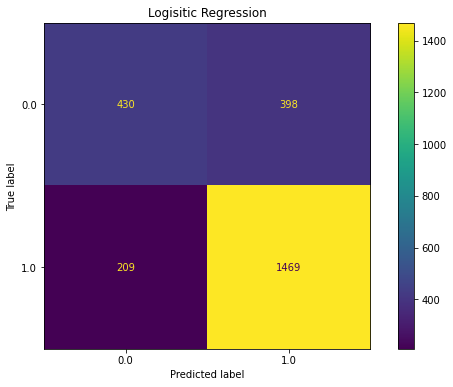

In [10]:
from sklearn import metrics
import matplotlib.pyplot as plt
log_reg.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Logisitic Regression')

disp = metrics.plot_confusion_matrix(log_reg, X_test, y_test, ax=ax)
disp.confusion_matrix

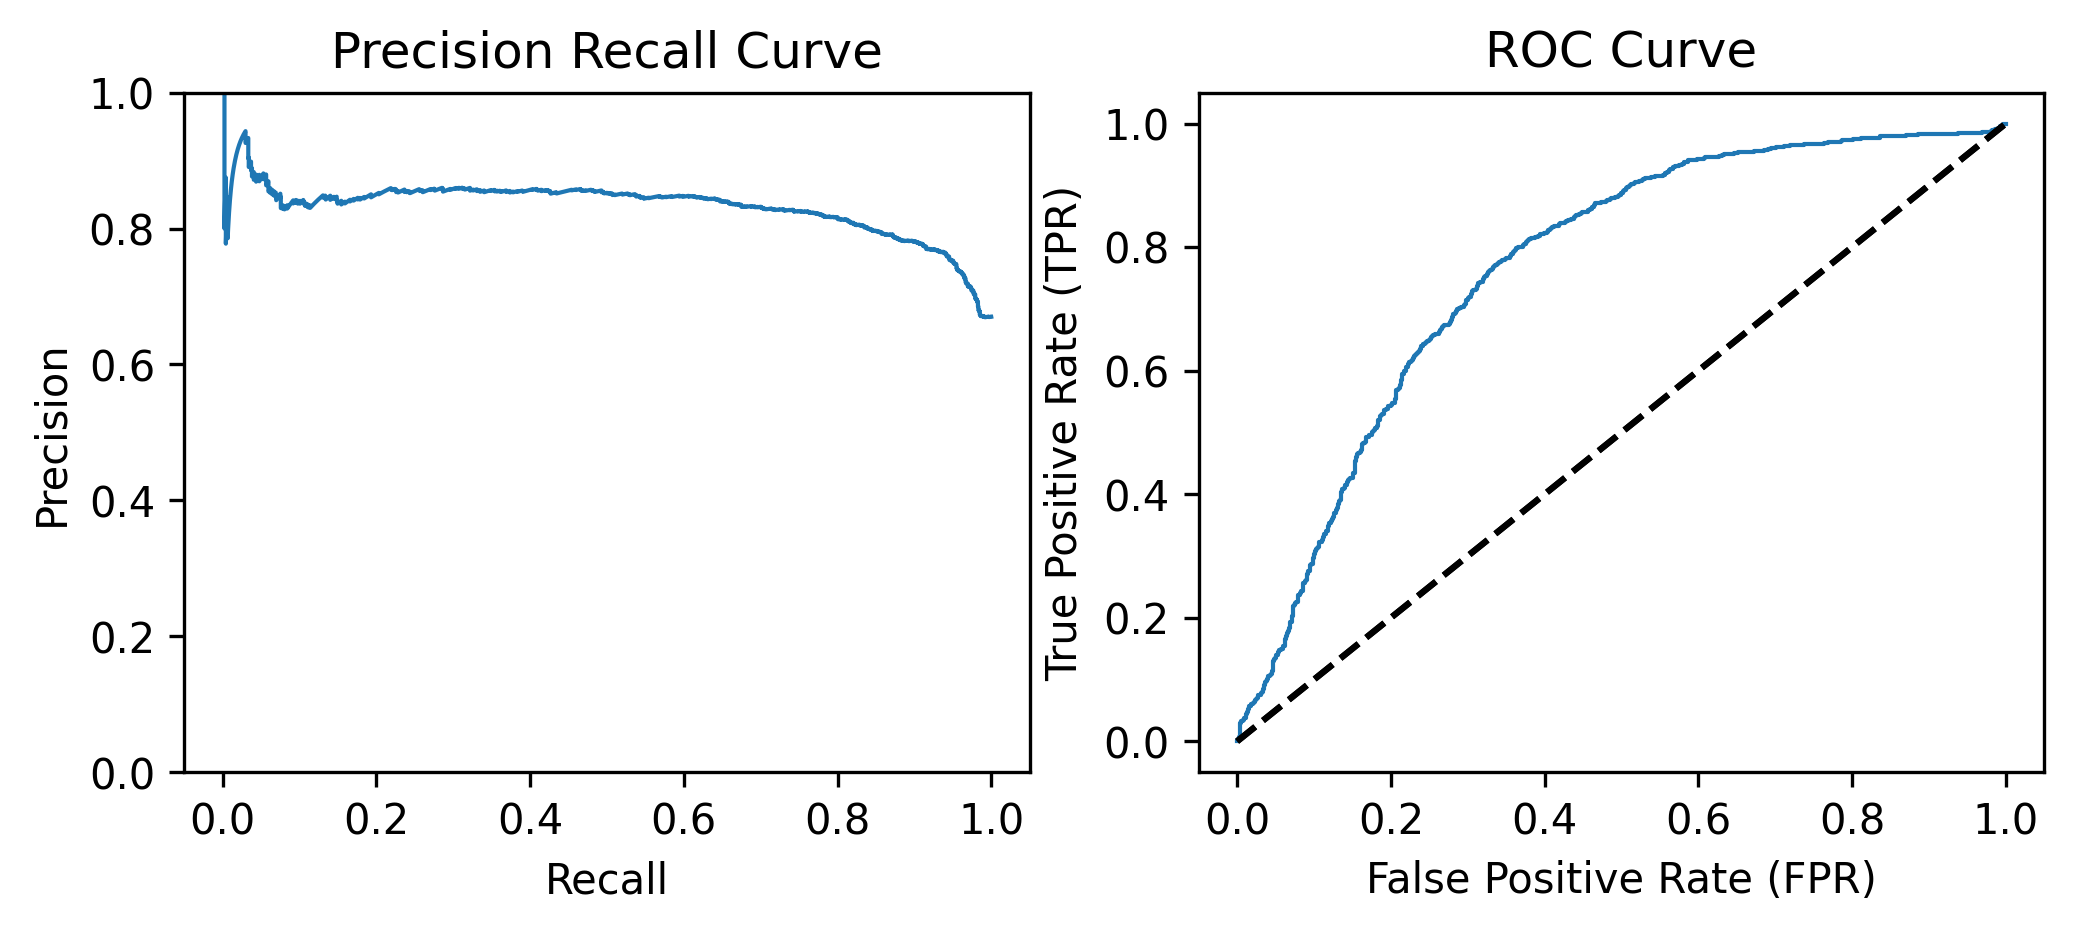

In [11]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3), dpi=300)
soft_pred = log_reg.predict_proba(X_test)[:,1]
precision_log, recall_log, _ = precision_recall_curve(y_test, soft_pred)
fpr_log, tpr_log, _ = roc_curve(y_test, soft_pred)

# plotting
plt.subplot(1,2,1)
plt.plot(recall_log, precision_log, linewidth=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1)
plt.title('Precision Recall Curve')
plt.subplot(1,2,2)
plt.plot(fpr_log, tpr_log, linewidth=1)
plt.plot([(0,0),(1,1)], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

plt.show()

# SVM (RBF)

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate

rbf = SVC(kernel='rbf')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_rbf = cross_validate(rbf, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'], cv=cv)

In [13]:
print(f"Accuracy: {np.round(scores_rbf['test_accuracy'], 4)}. Average is {np.round(np.mean(scores_rbf['test_accuracy'])*100, 2)}%")
print(f"Recall: {np.round(scores_rbf['test_recall'], 4)}. Average is {np.round(np.mean(scores_rbf['test_recall'])*100, 2)}%")
print(f"Precision: {np.round(scores_rbf['test_precision'], 4)}. Average is {np.round(np.mean(scores_rbf['test_precision'])*100, 2)}%")
print(f"F1 Score: {np.round(scores_rbf['test_f1'], 4)}. Average is {np.round(np.mean(scores_rbf['test_f1'])*100, 2)}%")
print(f"ROC AUC: {np.round(scores_rbf['test_roc_auc'], 4)}. Average is {np.round(np.mean(scores_rbf['test_roc_auc'])*100, 2)}%")

Accuracy: [0.7836 0.8016 0.7964 0.8124 0.7994 0.8044 0.7964 0.7984 0.7894 0.7605]. Average is 79.43%
Recall: [0.9267 0.9311 0.9296 0.9413 0.928  0.9354 0.9207 0.9457 0.9266 0.9001]. Average is 92.85%
Precision: [0.791  0.8069 0.8025 0.8124 0.8061 0.8074 0.8069 0.796  0.7967 0.7809]. Average is 80.07%
F1 Score: [0.8535 0.8645 0.8614 0.8721 0.8628 0.8667 0.8601 0.8644 0.8568 0.8363]. Average is 85.99%
ROC AUC: [0.7875 0.8205 0.8072 0.81   0.811  0.8276 0.8157 0.816  0.7941 0.7902]. Average is 80.8%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[ 400,  428],
       [ 118, 1560]])

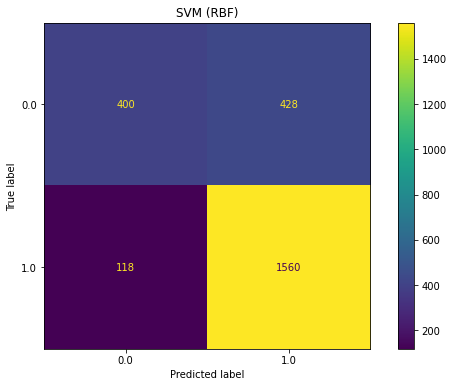

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate

rbf = SVC(kernel='rbf', probability=True)
rbf.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('SVM (RBF)')

disp = metrics.plot_confusion_matrix(rbf, X_test, y_test, ax=ax)
disp.confusion_matrix

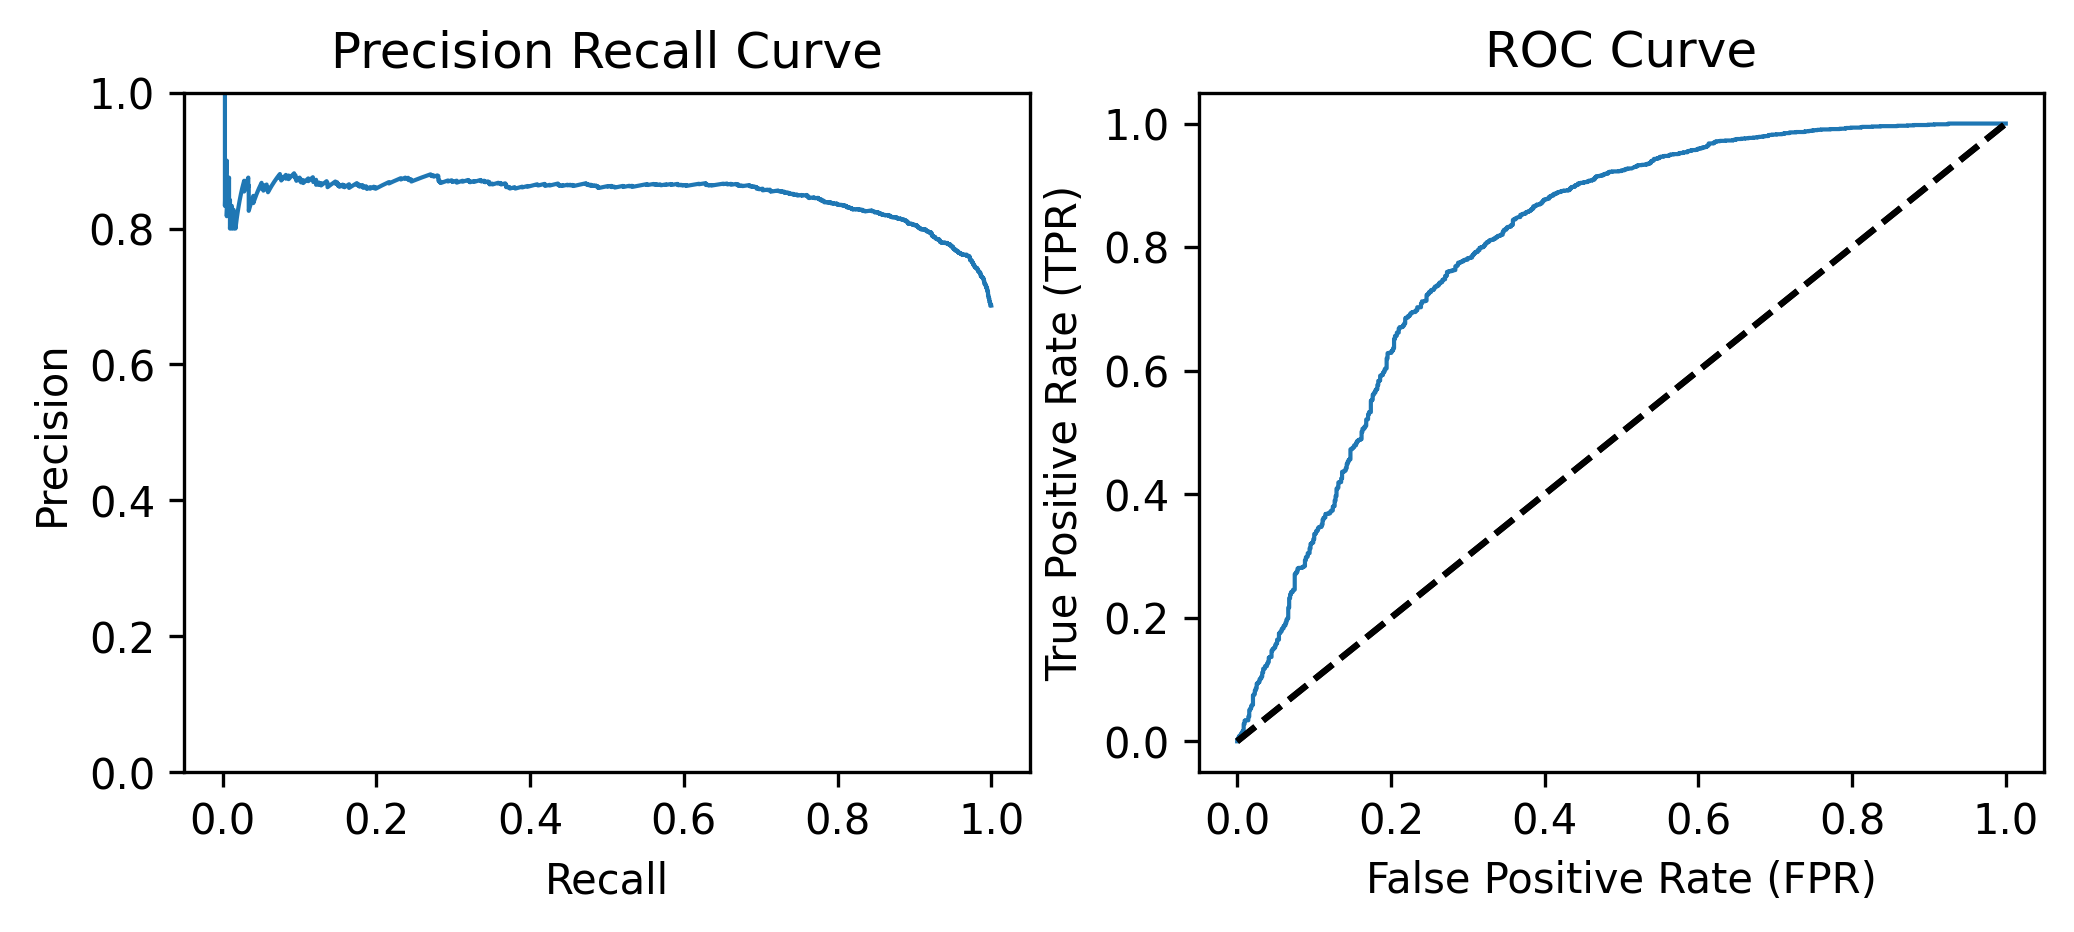

In [15]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3), dpi=300)
soft_pred = rbf.predict_proba(X_test)[:,1]
precision_rbf, recall_rbf, _ = precision_recall_curve(y_test, soft_pred)
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, soft_pred)

# plotting
plt.subplot(1,2,1)
plt.plot(recall_rbf, precision_rbf, linewidth=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1)
plt.title('Precision Recall Curve')
plt.subplot(1,2,2)
plt.plot(fpr_rbf, tpr_rbf, linewidth=1)
plt.plot([(0,0),(1,1)], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

plt.show()

# SVM (Poly)

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate

poly = SVC(kernel='poly', degree=2)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_poly = cross_validate(poly, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'], cv=cv)

In [17]:
print(f"Accuracy: {np.round(scores_poly['test_accuracy'], 4)}. Average is {np.round(np.mean(scores_poly['test_accuracy'])*100, 2)}%")
print(f"Recall: {np.round(scores_poly['test_recall'], 4)}. Average is {np.round(np.mean(scores_poly['test_recall'])*100, 2)}%")
print(f"Precision: {np.round(scores_poly['test_precision'], 4)}. Average is {np.round(np.mean(scores_poly['test_precision'])*100, 2)}%")
print(f"F1 Score: {np.round(scores_poly['test_f1'], 4)}. Average is {np.round(np.mean(scores_poly['test_f1'])*100, 2)}%")
print(f"ROC AUC: {np.round(scores_poly['test_roc_auc'], 4)}. Average is {np.round(np.mean(scores_poly['test_roc_auc'])*100, 2)}%")

Accuracy: [0.7717 0.7876 0.7774 0.7944 0.7794 0.7864 0.7814 0.7715 0.7725 0.7605]. Average is 77.83%
Recall: [0.9501 0.9472 0.9472 0.9413 0.9398 0.9486 0.9325 0.9501 0.9369 0.9383]. Average is 94.32%
Precision: [0.7687 0.7849 0.7755 0.7943 0.7805 0.783  0.7859 0.7684 0.7752 0.7634]. Average is 77.8%
F1 Score: [0.8498 0.8585 0.8528 0.8616 0.8528 0.8579 0.8529 0.8496 0.8484 0.8419]. Average is 85.26%
ROC AUC: [0.774  0.7985 0.7643 0.7867 0.7901 0.7936 0.786  0.7882 0.7669 0.75  ]. Average is 77.98%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[ 271,  557],
       [  52, 1626]])

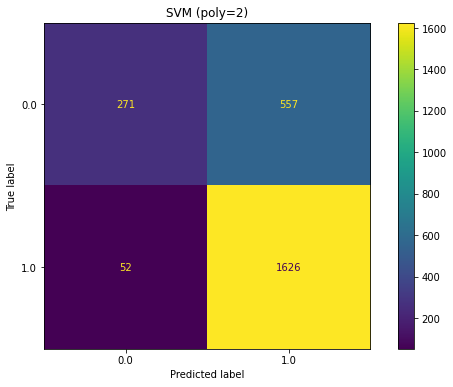

In [18]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate

poly = SVC(kernel='poly', probability=True)
poly.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('SVM (poly=2)')

disp = metrics.plot_confusion_matrix(poly, X_test, y_test, ax=ax)
disp.confusion_matrix

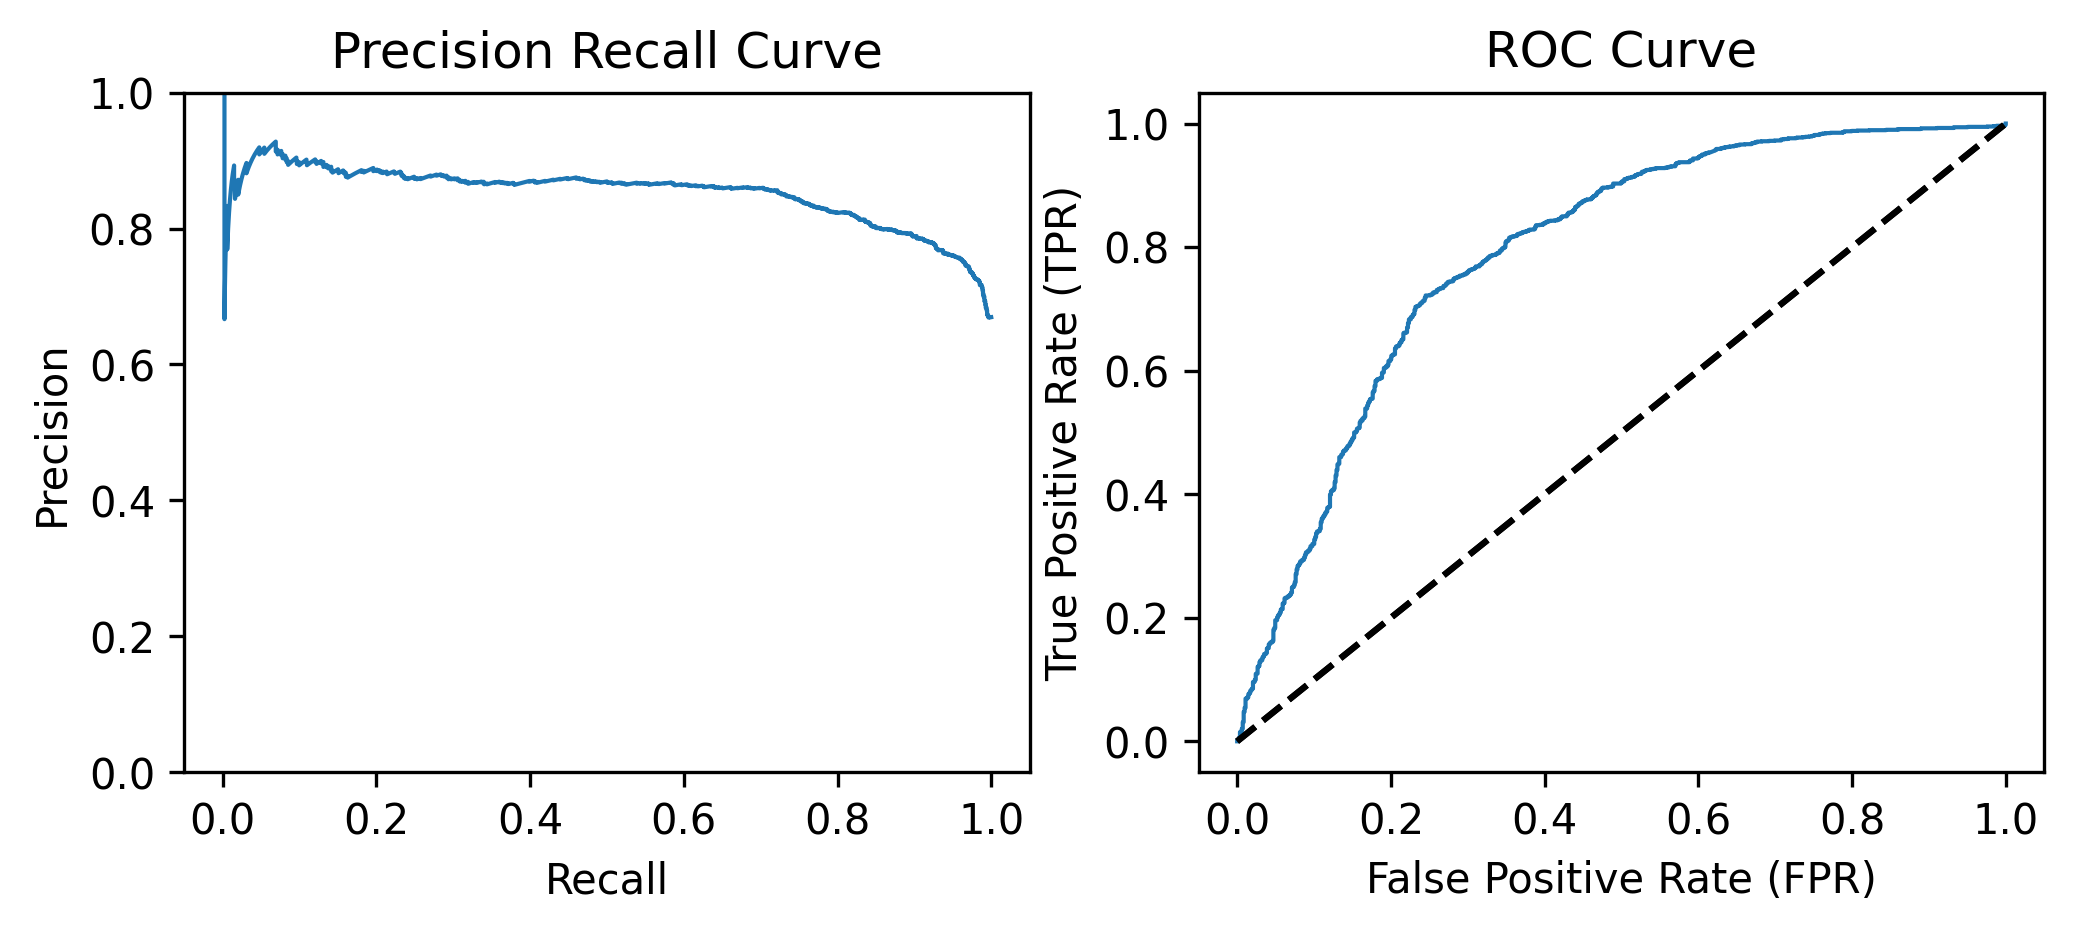

In [19]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3), dpi=300)
soft_pred = poly.predict_proba(X_test)[:,1]
precision_poly, recall_poly, _ = precision_recall_curve(y_test, soft_pred)
fpr_poly, tpr_poly, _ = roc_curve(y_test, soft_pred)

# plotting
plt.subplot(1,2,1)
plt.plot(recall_poly, precision_poly, linewidth=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1)
plt.title('Precision Recall Curve')
plt.subplot(1,2,2)
plt.plot(fpr_poly, tpr_poly, linewidth=1)
plt.plot([(0,0),(1,1)], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

plt.show()

# Decision Trees

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

tree = DecisionTreeClassifier(max_depth=4)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_tree = cross_validate(tree, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'], cv=cv)

In [21]:
print(f"Accuracy: {np.round(scores_tree['test_accuracy'], 4)}. Average is {np.round(np.mean(scores_tree['test_accuracy'])*100, 2)}%")
print(f"Recall: {np.round(scores_tree['test_recall'], 4)}. Average is {np.round(np.mean(scores_tree['test_recall'])*100, 2)}%")
print(f"Precision: {np.round(scores_tree['test_precision'], 4)}. Average is {np.round(np.mean(scores_tree['test_precision'])*100, 2)}%")
print(f"F1 Score: {np.round(scores_tree['test_f1'], 4)}. Average is {np.round(np.mean(scores_tree['test_f1'])*100, 2)}%")
print(f"ROC AUC: {np.round(scores_tree['test_roc_auc'], 4)}. Average is {np.round(np.mean(scores_tree['test_roc_auc'])*100, 2)}%")

Accuracy: [0.7956 0.7936 0.7814 0.7954 0.7934 0.7944 0.7804 0.7804 0.7615 0.7515]. Average is 78.28%
Recall: [0.9326 0.8944 0.9208 0.884  0.8972 0.9001 0.8987 0.8987 0.8987 0.8576]. Average is 89.83%
Precision: [0.8    0.8188 0.7919 0.8269 0.8168 0.8162 0.8021 0.8021 0.7826 0.7935]. Average is 80.51%
F1 Score: [0.8612 0.8549 0.8515 0.8545 0.8551 0.8561 0.8476 0.8476 0.8366 0.8243]. Average is 84.9%
ROC AUC: [0.7917 0.7938 0.7914 0.7968 0.793  0.7949 0.7926 0.7863 0.7649 0.7675]. Average is 78.73%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[ 426,  402],
       [ 178, 1500]])

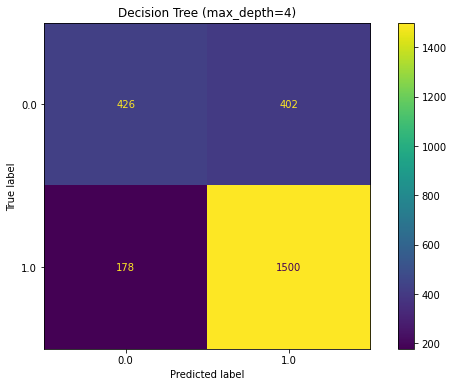

In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate

# tree = SVC(kernel='tree', probability=True)
tree.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Decision Tree (max_depth=4)')

disp = metrics.plot_confusion_matrix(tree, X_test, y_test, ax=ax)
disp.confusion_matrix

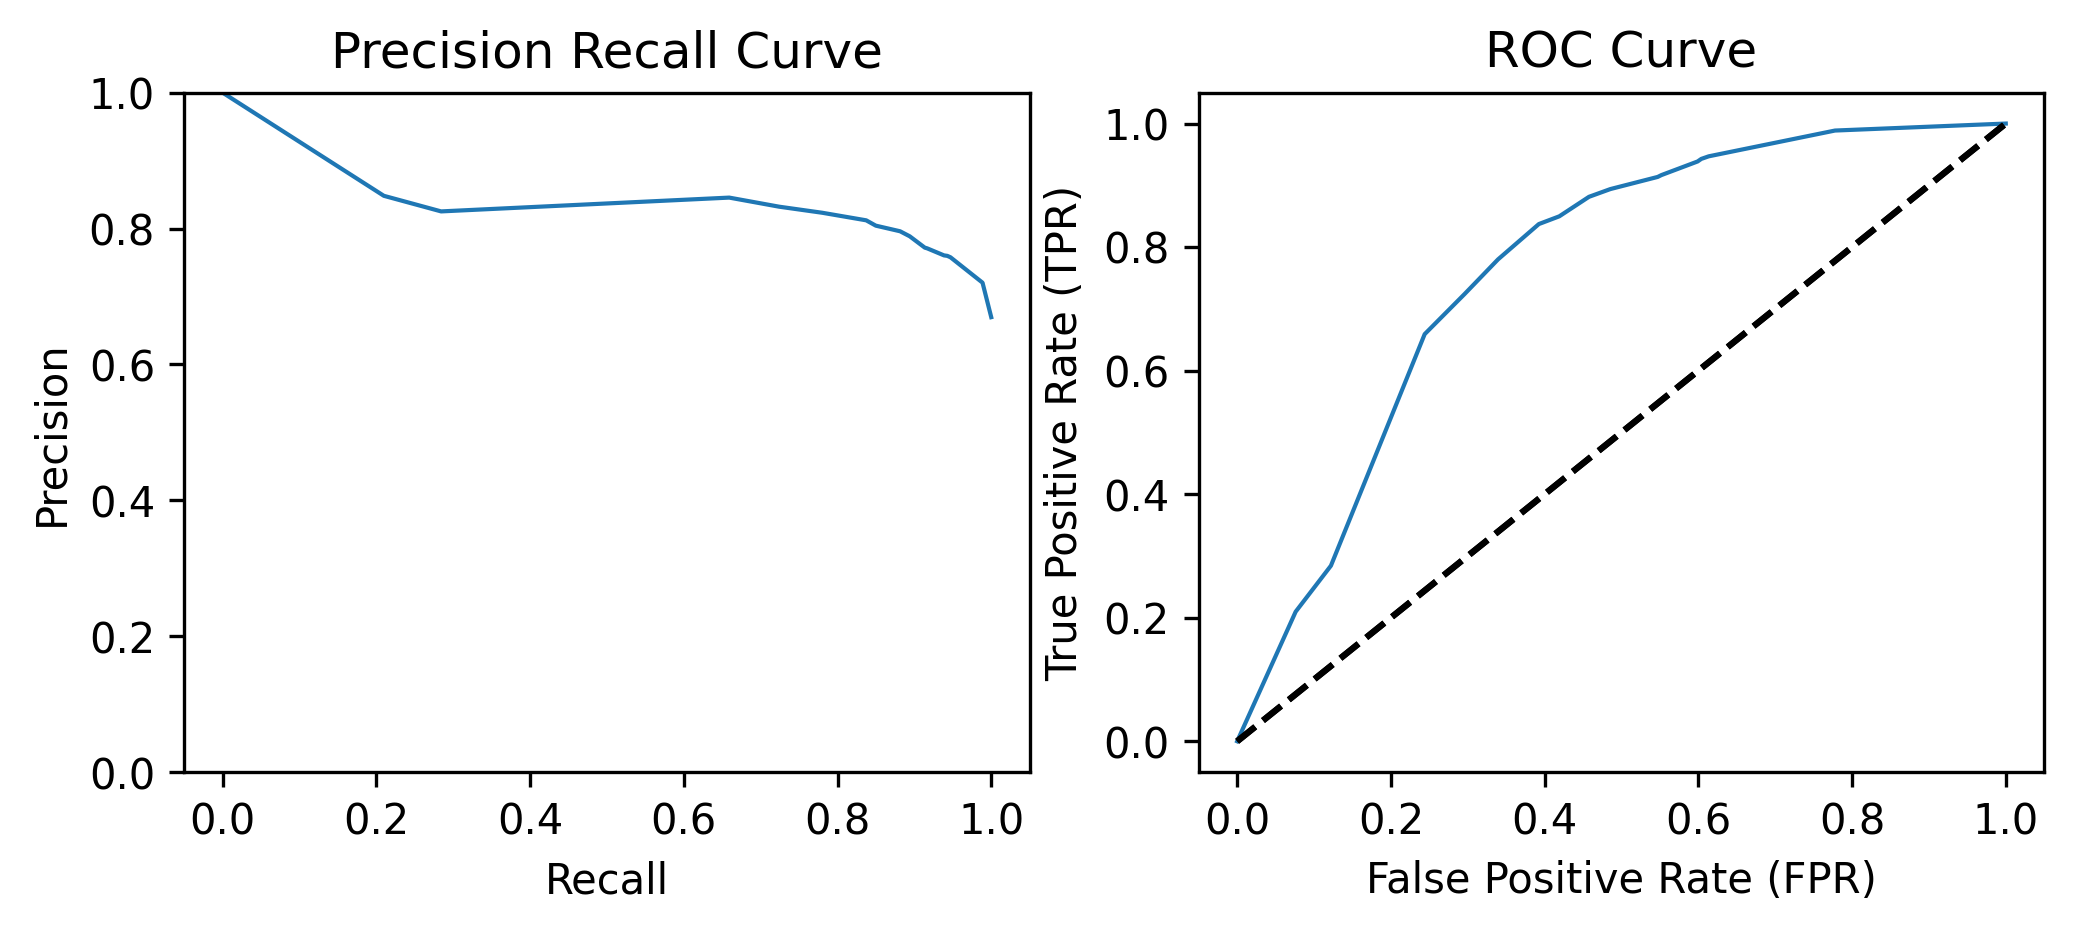

In [23]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3), dpi=300)
soft_pred = tree.predict_proba(X_test)[:,1]
precision_tree, recall_tree, _ = precision_recall_curve(y_test, soft_pred)
fpr_tree, tpr_tree, _ = roc_curve(y_test, soft_pred)

# plotting
plt.subplot(1,2,1)
plt.plot(recall_tree, precision_tree, linewidth=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1)
plt.title('Precision Recall Curve')
plt.subplot(1,2,2)
plt.plot(fpr_tree, tpr_tree, linewidth=1)
plt.plot([(0,0),(1,1)], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

plt.show()

# Random Forests

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

forest = RandomForestClassifier(n_estimators=1000, max_depth=25, n_jobs=-1)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_forest = cross_validate(forest, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'], cv=cv)

In [25]:
print(f"Accuracy: {np.round(scores_forest['test_accuracy'], 4)}. Average is {np.round(np.mean(scores_forest['test_accuracy'])*100, 2)}%")
print(f"Recall: {np.round(scores_forest['test_recall'], 4)}. Average is {np.round(np.mean(scores_forest['test_recall'])*100, 2)}%")
print(f"Precision: {np.round(scores_forest['test_precision'], 4)}. Average is {np.round(np.mean(scores_forest['test_precision'])*100, 2)}%")
print(f"F1 Score: {np.round(scores_forest['test_f1'], 4)}. Average is {np.round(np.mean(scores_forest['test_f1'])*100, 2)}%")
print(f"ROC AUC: {np.round(scores_forest['test_roc_auc'], 4)}. Average is {np.round(np.mean(scores_forest['test_roc_auc'])*100, 2)}%")

Accuracy: [0.8205 0.8425 0.8263 0.8363 0.8343 0.8443 0.8373 0.8323 0.8044 0.8084]. Average is 82.87%
Recall: [0.9326 0.937  0.9326 0.9442 0.9266 0.9457 0.9383 0.9427 0.9236 0.9119]. Average is 93.35%
Precision: [0.826  0.8475 0.8325 0.8362 0.8447 0.844  0.8408 0.8327 0.8137 0.8247]. Average is 83.43%
F1 Score: [0.876  0.89   0.8797 0.8869 0.8838 0.892  0.8869 0.8843 0.8652 0.8661]. Average is 88.11%
ROC AUC: [0.8489 0.8749 0.8649 0.8606 0.8667 0.8724 0.8754 0.8726 0.8386 0.8541]. Average is 86.29%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[ 501,  327],
       [ 111, 1567]])

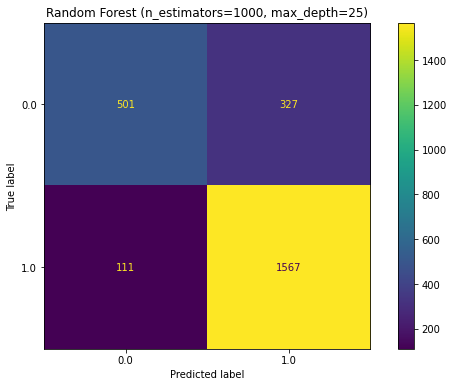

In [26]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC

forest = RandomForestClassifier(n_estimators=1000, max_depth=25, n_jobs=-1)
forest.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Random Forest (n_estimators=1000, max_depth=25)')

disp = metrics.plot_confusion_matrix(forest, X_test, y_test, ax=ax)
disp.confusion_matrix

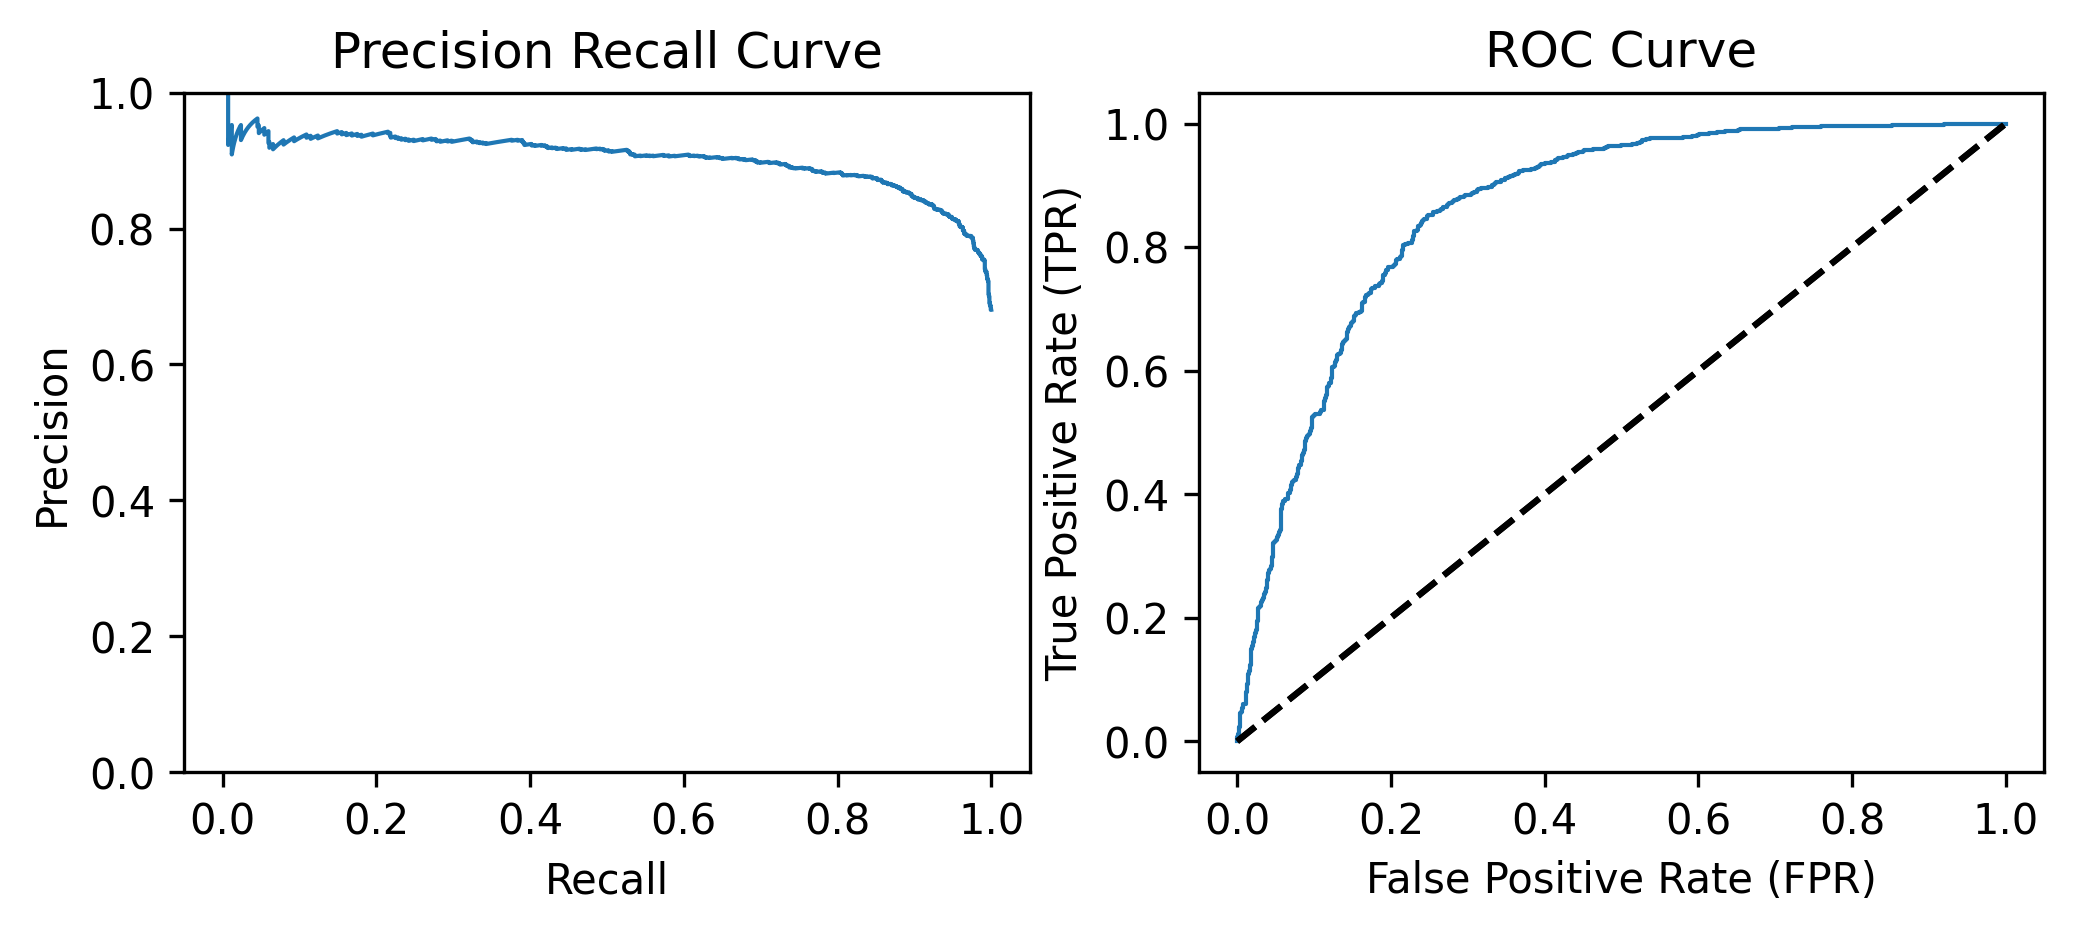

In [27]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3), dpi=300)
soft_pred = forest.predict_proba(X_test)[:,1]
precision_forest, recall_forest, _ = precision_recall_curve(y_test, soft_pred)
fpr_forest, tpr_forest, _ = roc_curve(y_test, soft_pred)

# plotting
plt.subplot(1,2,1)
plt.plot(recall_forest, precision_forest, linewidth=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1)
plt.title('Precision Recall Curve')
plt.subplot(1,2,2)
plt.plot(fpr_forest, tpr_forest, linewidth=1)
plt.plot([(0,0),(1,1)], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

plt.show()

# Neural Networks

In [28]:
from tensorflow import keras
from sklearn.model_selection import StratifiedKFold, cross_validate
from scikeras.wrappers import KerasClassifier

nn = keras.models.Sequential([
    keras.layers.Dense(1000, activation="elu", kernel_initializer='he_normal', input_shape=X_train[0].shape),
    keras.layers.Dense(1000, activation="elu", kernel_initializer='he_normal'),
    keras.layers.Dense(1, activation="sigmoid")
])
nn.summary()
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
nn_clf = KerasClassifier(nn, epochs=15)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_nn_clf = cross_validate(nn_clf, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'], cv=cv)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              2026000   
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 3,028,001
Trainable params: 3,028,001
Non-trainable params: 0
_________________________________________________________________


2022-05-20 09:28:12.278023: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-20 09:28:12.640848: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram:///var/folders/bt/bb6h7f3s12d32pgb54_pbjph0000gn/T/tmpq83fpvja/assets
Epoch 1/15
282/282 [==============================] - 3s 9ms/step - loss: 0.9477 - accuracy: 0.7476
Epoch 2/15
282/282 [==============================] - 3s 9ms/step - loss: 0.4839 - accuracy: 0.7983
Epoch 3/15
282/282 [==============================] - 3s 9ms/step - loss: 0.4635 - accuracy: 0.8135
Epoch 4/15
282/282 [==============================] - 3s 9ms/step - loss: 0.4068 - accuracy: 0.8244
Epoch 5/15
282/282 [==============================] - 3s 9ms/step - loss: 0.3812 - accuracy: 0.8357
Epoch 6/15
282/282 [==============================] - 3s 9ms/step - loss: 0.3533 - accuracy: 0.8473
Epoch 7/15
282/282 [==============================] - 3s 9ms/step - loss: 0.3322 - accuracy: 0.8575
Epoch 8/15
282/282 [==============================] - 3s 9ms/step - loss: 0.3160 - accuracy: 0.8635
Epoch 9/15
282/282 [==============================] - 3s 9ms/step - loss: 0.2883 - accuracy

In [29]:
print(f"Accuracy: {np.round(scores_nn_clf['test_accuracy'], 4)}. Average is {np.round(np.mean(scores_nn_clf['test_accuracy'])*100, 2)}%")
print(f"Recall: {np.round(scores_nn_clf['test_recall'], 4)}. Average is {np.round(np.mean(scores_nn_clf['test_recall'])*100, 2)}%")
print(f"Precision: {np.round(scores_nn_clf['test_precision'], 4)}. Average is {np.round(np.mean(scores_nn_clf['test_precision'])*100, 2)}%")
print(f"F1 Score: {np.round(scores_nn_clf['test_f1'], 4)}. Average is {np.round(np.mean(scores_nn_clf['test_f1'])*100, 2)}%")
print(f"ROC AUC: {np.round(scores_nn_clf['test_roc_auc'], 4)}. Average is {np.round(np.mean(scores_nn_clf['test_roc_auc'])*100, 2)}%")

Accuracy: [0.8116 0.8006 0.8014 0.8154 0.7994 0.7984 0.7725 0.7764 0.7814 0.7834]. Average is 79.41%
Recall: [0.9032 0.8636 0.8768 0.9134 0.8576 0.8634 0.859  0.9134 0.8678 0.8972]. Average is 88.16%
Precision: [0.8336 0.8463 0.8387 0.8316 0.8488 0.8436 0.8159 0.7903 0.8208 0.8061]. Average is 82.76%
F1 Score: [0.867  0.8549 0.8573 0.8705 0.8532 0.8534 0.8369 0.8474 0.8437 0.8492]. Average is 85.34%
ROC AUC: [0.8039 0.8361 0.8125 0.8361 0.8204 0.8122 0.8063 0.8046 0.7987 0.8015]. Average is 81.32%


Epoch 1/15
314/314 [==============================] - 3s 9ms/step - loss: 0.1736 - accuracy: 0.9314
Epoch 2/15
314/314 [==============================] - 3s 10ms/step - loss: 0.1240 - accuracy: 0.9520
Epoch 3/15
314/314 [==============================] - 3s 10ms/step - loss: 0.1196 - accuracy: 0.9538
Epoch 4/15
314/314 [==============================] - 3s 9ms/step - loss: 0.1156 - accuracy: 0.9539
Epoch 5/15
314/314 [==============================] - 3s 9ms/step - loss: 0.1098 - accuracy: 0.9577
Epoch 6/15
314/314 [==============================] - 3s 10ms/step - loss: 0.1146 - accuracy: 0.9555
Epoch 7/15
314/314 [==============================] - 3s 10ms/step - loss: 0.0891 - accuracy: 0.9653
Epoch 8/15
314/314 [==============================] - 3s 10ms/step - loss: 0.1006 - accuracy: 0.9610
Epoch 9/15
314/314 [==============================] - 3s 10ms/step - loss: 0.0897 - accuracy: 0.9663
Epoch 10/15
314/314 [==============================] - 3s 9ms/step - loss: 0.1030 - accuracy: 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


79/79 [==============================] - 0s 2ms/step


array([[ 505,  323],
       [ 188, 1490]])

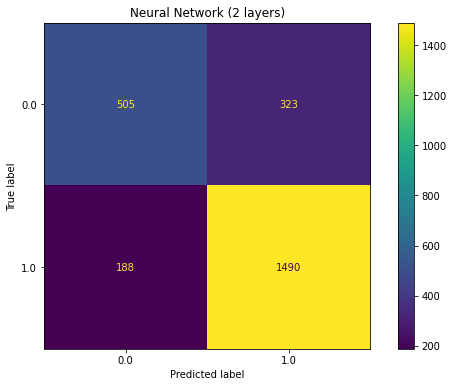

In [42]:
from sklearn import metrics
import matplotlib.pyplot as plt

nn_clf.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Neural Network (2 layers)')

disp = metrics.plot_confusion_matrix(nn_clf, X_test, y_test, ax=ax)
disp.confusion_matrix

79/79 [==============================] - 0s 2ms/step


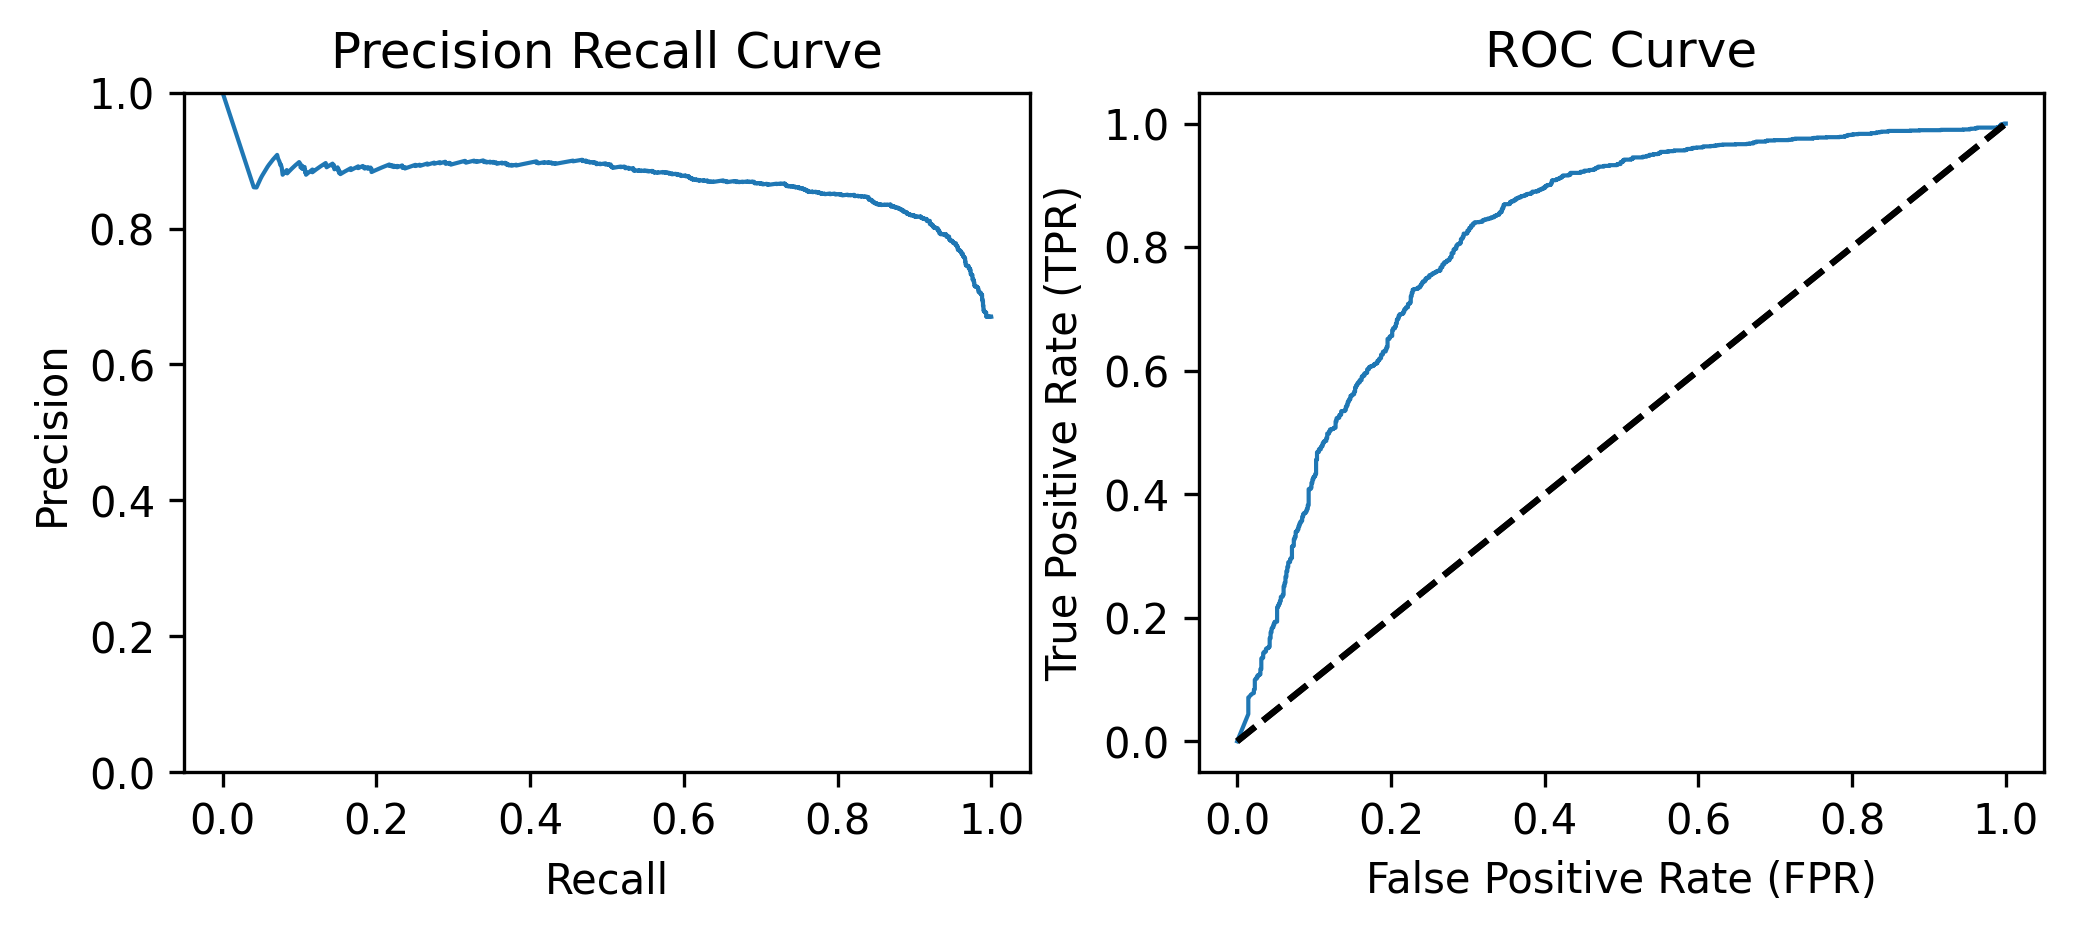

In [31]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3), dpi=300)
soft_pred = nn_clf.predict_proba(X_test)[:,1]
precision_nn, recall_nn, _ = precision_recall_curve(y_test, soft_pred)
fpr_nn, tpr_nn, _ = roc_curve(y_test, soft_pred)

# plotting
plt.subplot(1,2,1)
plt.plot(recall_nn, precision_nn, linewidth=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1)
plt.title('Precision Recall Curve')
plt.subplot(1,2,2)
plt.plot(fpr_nn, tpr_nn, linewidth=1)
plt.plot([(0,0),(1,1)], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

plt.show()

# Deep Neural Networks

In [32]:
from tensorflow import keras
from sklearn.model_selection import StratifiedKFold, cross_validate
from scikeras.wrappers import KerasClassifier

dnn = keras.models.Sequential([
    keras.layers.Dense(1000, activation="elu", kernel_initializer='random_normal', input_shape=X_train[0].shape),
    keras.layers.Dense(500, activation="elu", kernel_initializer='random_normal'),
    keras.layers.Dense(250, activation="elu", kernel_initializer='random_normal'),
    keras.layers.Dense(50, activation="elu", kernel_initializer='random_normal'),
    keras.layers.Dense(10, activation="elu", kernel_initializer='random_normal'),
    keras.layers.Dense(1, activation="sigmoid")
])
dnn.summary()
dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
dnn_clf = KerasClassifier(dnn, epochs=7)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_dnn_clf = cross_validate(dnn_clf, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'], cv=cv)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1000)              2026000   
                                                                 
 dense_4 (Dense)             (None, 500)               500500    
                                                                 
 dense_5 (Dense)             (None, 250)               125250    
                                                                 
 dense_6 (Dense)             (None, 50)                12550     
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,664,821
Trainable params: 2,664,821
No

In [33]:
print(f"Accuracy: {np.round(scores_dnn_clf['test_accuracy'], 4)}. Average is {np.round(np.mean(scores_dnn_clf['test_accuracy'])*100, 2)}%")
print(f"Recall: {np.round(scores_dnn_clf['test_recall'], 4)}. Average is {np.round(np.mean(scores_dnn_clf['test_recall'])*100, 2)}%")
print(f"Precision: {np.round(scores_dnn_clf['test_precision'], 4)}. Average is {np.round(np.mean(scores_dnn_clf['test_precision'])*100, 2)}%")
print(f"F1 Score: {np.round(scores_dnn_clf['test_f1'], 4)}. Average is {np.round(np.mean(scores_dnn_clf['test_f1'])*100, 2)}%")
print(f"ROC AUC: {np.round(scores_dnn_clf['test_roc_auc'], 4)}. Average is {np.round(np.mean(scores_dnn_clf['test_roc_auc'])*100, 2)}%")

Accuracy: [0.7827 0.8046 0.7934 0.8084 0.8024 0.7904 0.7934 0.8084 0.7754 0.7874]. Average is 79.47%
Recall: [0.8636 0.893  0.8959 0.8737 0.906  0.9266 0.8987 0.8855 0.8796 0.9192]. Average is 89.42%
Precision: [0.8249 0.832  0.8179 0.8488 0.8216 0.7977 0.816  0.841  0.8073 0.7985]. Average is 82.06%
F1 Score: [0.8438 0.8614 0.8551 0.8611 0.8617 0.8573 0.8553 0.8627 0.8419 0.8546]. Average is 85.55%
ROC AUC: [0.79   0.8188 0.8121 0.8376 0.8191 0.8284 0.8328 0.8464 0.8051 0.7918]. Average is 81.82%


Epoch 1/7
314/314 [==============================] - 5s 15ms/step - loss: 0.4886 - accuracy: 0.7856
Epoch 2/7
314/314 [==============================] - 5s 15ms/step - loss: 0.4572 - accuracy: 0.8014
Epoch 3/7
314/314 [==============================] - 5s 15ms/step - loss: 0.4469 - accuracy: 0.8083
Epoch 4/7
314/314 [==============================] - 5s 15ms/step - loss: 0.4342 - accuracy: 0.8154
Epoch 5/7
314/314 [==============================] - 5s 15ms/step - loss: 0.4161 - accuracy: 0.8257
Epoch 6/7
314/314 [==============================] - 5s 15ms/step - loss: 0.4064 - accuracy: 0.8265
Epoch 7/7
35/79 [============>.................] - ETA: 0s

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


79/79 [==============================] - 0s 3ms/step


array([[ 458,  370],
       [ 160, 1518]])

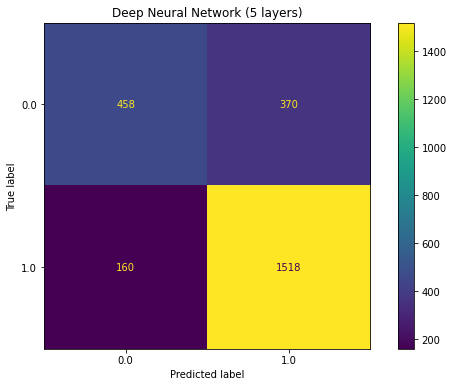

In [34]:
from sklearn import metrics
import matplotlib.pyplot as plt

dnn_clf.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Deep Neural Network (5 layers)')

disp = metrics.plot_confusion_matrix(dnn_clf, X_test, y_test, ax=ax)
disp.confusion_matrix

79/79 [==============================] - 0s 3ms/step


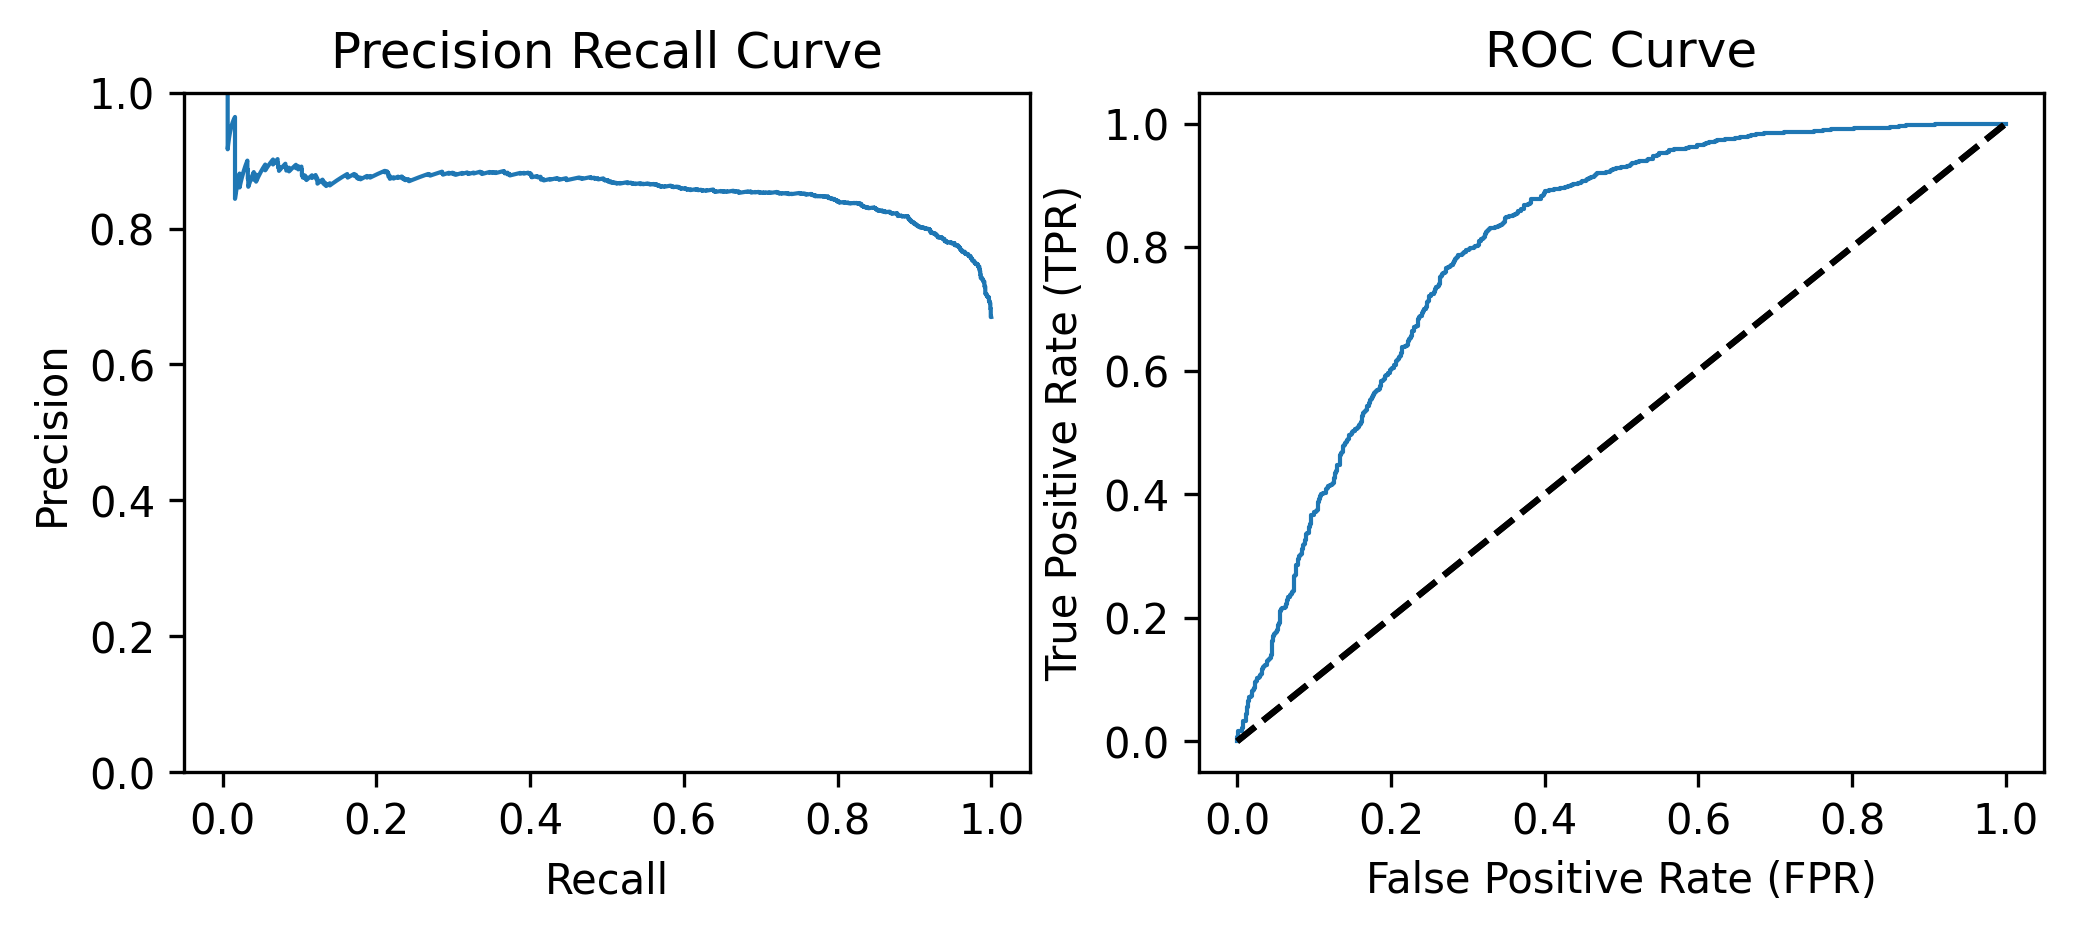

In [35]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3), dpi=300)
soft_pred = dnn_clf.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, soft_pred)
fpr, tpr, thresholds = roc_curve(y_test, soft_pred)

# plotting
precision_dnn, recall_dnn, _ = precision_recall_curve(y_test, soft_pred)
fpr_dnn, tpr_dnn, _ = roc_curve(y_test, soft_pred)

# plotting
plt.subplot(1,2,1)
plt.plot(recall_dnn, precision_dnn, linewidth=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1)
plt.title('Precision Recall Curve')
plt.subplot(1,2,2)
plt.plot(fpr_dnn, tpr_dnn, linewidth=1)
plt.plot([(0,0),(1,1)], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

plt.show()

# Summary

In [39]:
import pandas as pd
import numpy as np
final_scores = {}
scores = ['scores_log', 'scores_rbf', 'scores_poly', 'scores_tree', 'scores_forest', 'scores_nn_clf', 'scores_dnn_clf']
metrics = ['fit_time', 'score_time', 'test_accuracy', 'test_f1', 'test_recall', 'test_precision', 'test_roc_auc']
for i in scores:
    final_scores[i] = []
    for j in metrics:
        val = np.mean(globals()[i][j])
        final_scores[i].append(val)

summary = pd.DataFrame(final_scores)
summary.columns = ['Logisitic Regression', 'SVM (RBF)', 'SVM (poly=2)', 'Decision Tree', 'Random Forest', 'NN (2 layers)', 'NN (5 layers)']
metrics = metrics = ['fit_time', 'score_time', 'test_accuracy', 'test_f1', 'test_recall', 'test_precision', 'test_roc_auc']
summary.index = ['Fit Time', 'Score Time', 'Accuracy', 'F1', 'Recall', 'Precision', 'ROC AUC']
summary

,Logisitic Regression,SVM (RBF),SVM (poly=2),Decision Tree,Random Forest,NN (2 layers),NN (5 layers)
Fit Time,18.573752,55.096390,57.393475,1.269533,14.659716,38.835040,29.899152
Score Time,0.018455,14.006384,10.215661,0.014074,0.409288,0.270345,0.324625
Accuracy,0.763223,0.794253,0.778287,0.782776,0.828676,0.794051,0.794652
F1,0.831140,0.859855,0.852620,0.848967,0.881078,0.853354,0.855501
Recall,0.857186,0.928519,0.943195,0.898275,0.933509,0.881550,0.894177
Precision,0.806665,0.800688,0.777990,0.805102,0.834270,0.827568,0.820567
ROC AUC,0.765803,0.807963,0.779833,0.787307,0.862898,0.813222,0.818214


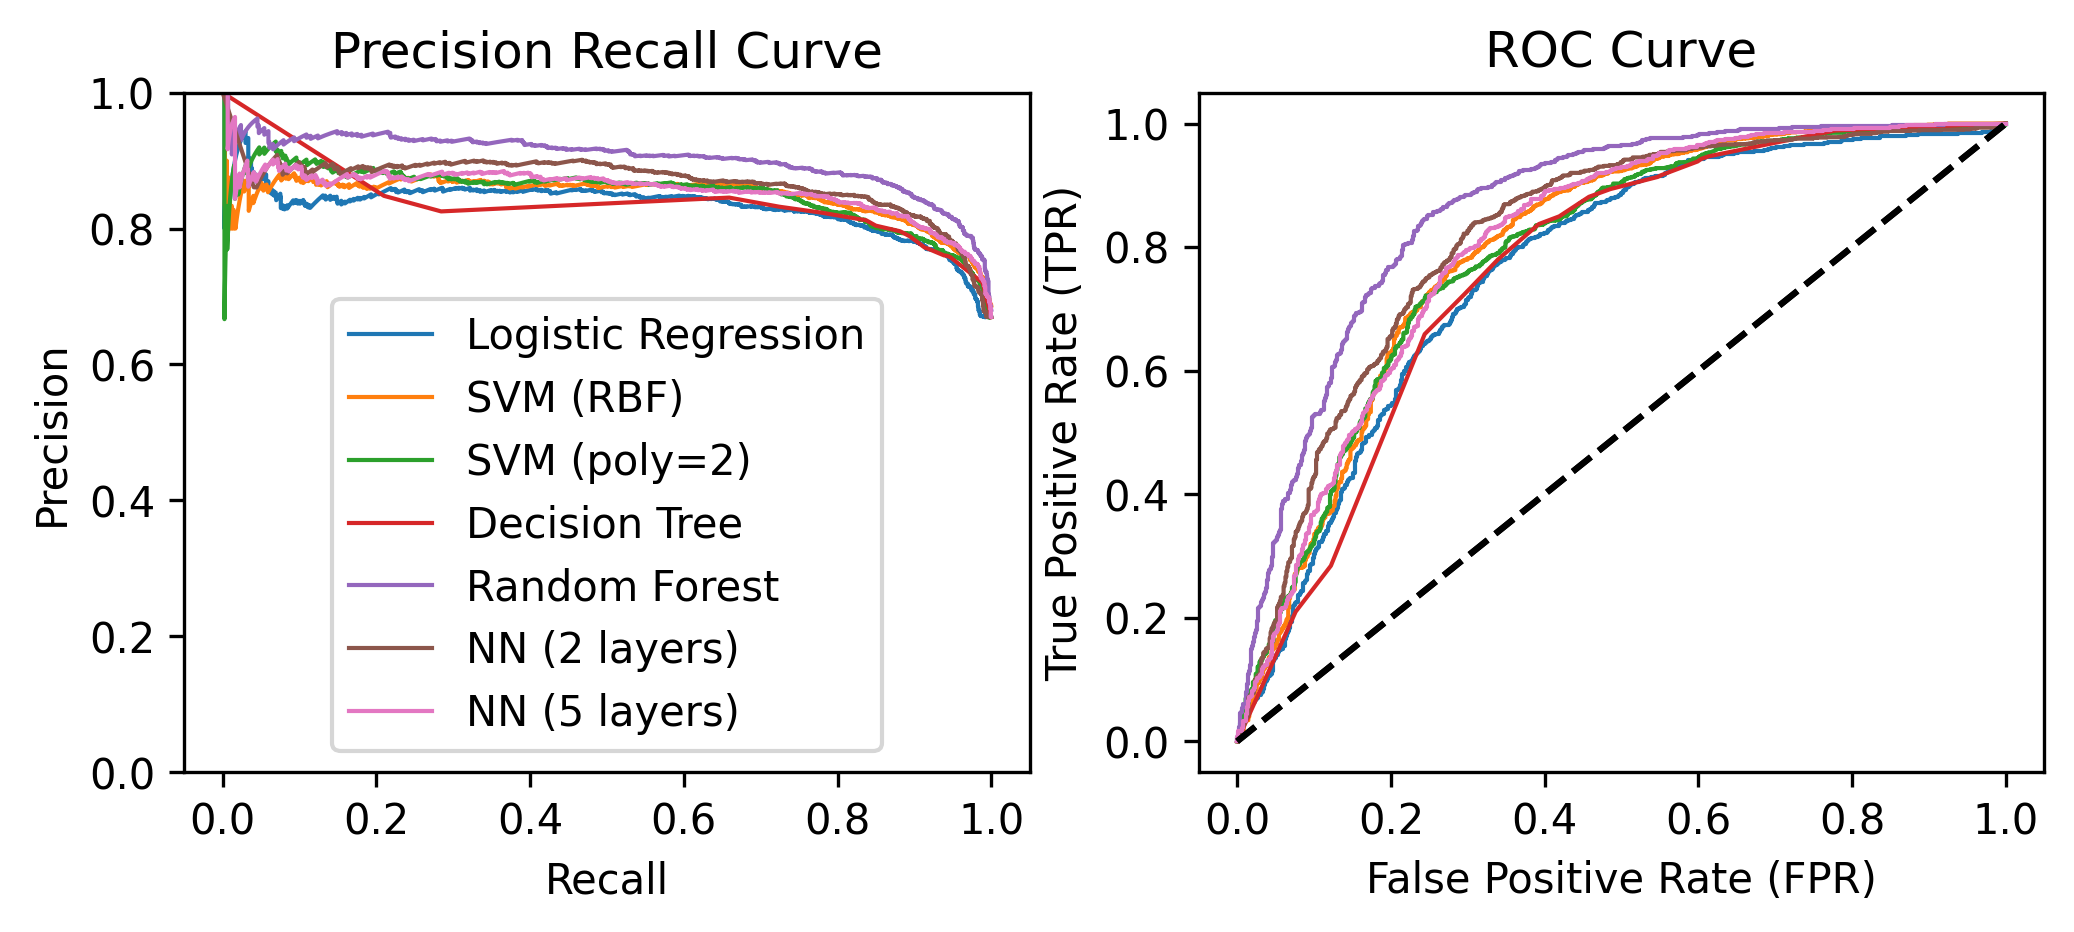

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3), dpi=300)
plt.subplot(1,2,1)
plt.plot(recall_log, precision_log, linewidth=1, label='Logistic Regression')
plt.plot(recall_rbf, precision_rbf, linewidth=1, label='SVM (RBF)')
plt.plot(recall_poly, precision_poly, linewidth=1, label='SVM (poly=2)')
plt.plot(recall_tree, precision_tree, linewidth=1, label='Decision Tree')
plt.plot(recall_forest, precision_forest, linewidth=1, label='Random Forest')
plt.plot(recall_nn, precision_nn, linewidth=1, label='NN (2 layers)')
plt.plot(recall_dnn, precision_dnn, linewidth=1, label='NN (5 layers)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1)
plt.title('Precision Recall Curve')
plt.legend()
plt.subplot(1,2,2)
plt.plot(fpr_log, tpr_log, linewidth=1, label='Logistic Regression')
plt.plot(fpr_rbf, tpr_rbf, linewidth=1, label='SVM (RBF)')
plt.plot(fpr_poly, tpr_poly, linewidth=1, label='SVM (poly=2)')
plt.plot(fpr_tree, tpr_tree, linewidth=1, label='Decision Tree')
plt.plot(fpr_forest, tpr_forest, linewidth=1, label='Random Forest')
plt.plot(fpr_nn, tpr_nn, linewidth=1, label='NN (2 layers)')
plt.plot(fpr_dnn, tpr_dnn, linewidth=1, label='NN (5 layers)')
plt.plot([(0,0),(1,1)], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

plt.show()